In [75]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
import scipy.stats as stats

In [76]:
def gen_data(nobs = 1000,
                a = 1,
                b = 1,
                c = 1,
                d = 1,
                f = 1,
                se = 1,
                su = 1,
                sw = 1,
                sv = 1):

    #unobserved variables
    e = np.random.normal(0,se,nobs)
    u = np.random.normal(0,su,nobs)
    v = np.random.normal(0,sv,nobs)
    w = np.random.normal(0,sw,nobs)

    #observed variables
    z = u + f*v # z will have an attrion bias for beta 
    x = u + d*(w>=0) - 5*d*w*(w<=0) # x will have an omitted variables bias
    # it's related to the degree of variation on the support of x
    # needs to flip sign for some? i.e. d*(w>=0) - d*w*(w<=0)... like the population needs a heterogeneous response to the
    # 
    # omitted variable...
    # 
    
    #the omitted variable "skews" the predcitions towards the area of the support where it is correlated 
    #with the endogenous variable.
    
    y = a + b*u + c*w + e
    return y,x,z

In [77]:
class OLS_loglike(GenericLikelihoodModel):
    
    def __init__(self, *args,ols=False, **kwargs):
        super(OLS_loglike,self).__init__(*args,**kwargs)
        self.ols = ols

    def loglikeobs(self, params):
        y = self.endog
        x = self.exog
        mu_y = np.matmul(x,params)  
        resid = y - mu_y
        sigma = np.sqrt(np.sum(resid**2)/resid.shape[0])
        pr_y = stats.norm.logpdf( resid, loc=0,scale=sigma )
        return pr_y
    
def setup_model(yn,xn):
    """setup models for ease"""
    model1 = sm.OLS(yn,sm.add_constant(xn))
    model1_fit = model1.fit(disp=False)
    params1 = (model1_fit.params)
    model1_deriv = OLS_loglike(yn,sm.add_constant(xn))
    ll1 = model1_deriv.loglikeobs(model1_fit.params)
    #print('--') #analytical likelihood for OLS...
    #print(ll1.mean())
    #print( -1/2*np.log(2*np.pi) - np.log(model1_fit.resid.std()) -1/2 )
    #print('--')
    grad1 =  model1_deriv.score_obs(model1_fit.params)    
    hess1 = model1_deriv.hessian(model1_fit.params)
    
    #add in econometric error?
    shuffle_fit = model1_fit.resid.copy()
    np.random.shuffle(shuffle_fit)
    #model1_fit.fittedvalues,model1_fit.resid,
    return ll1,model1_fit.fittedvalues + shuffle_fit

-1883.95123146048


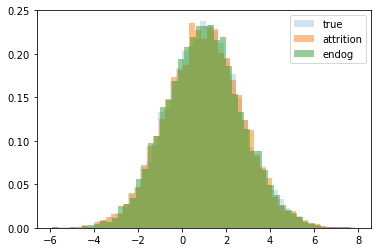

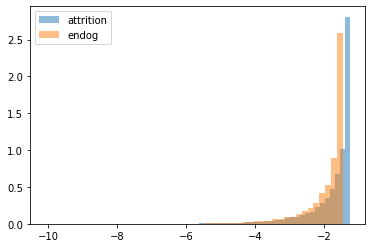

In [78]:
n = 10000
y,x,z = gen_data(nobs=n,
                d = 1,
                f = 0,
                c = 1,
                b = 1,
                su = 1,
                sw = 1,
                sv = 1)

l1,yhat1 = setup_model(y,sm.add_constant(x))
l2,yhat2 = setup_model(y,sm.add_constant(z))
print(l1.sum()-l2.sum())

plt.hist(y,bins=int(n/200),alpha=.2,label='true',density=True)
plt.hist(yhat2,bins=int(n/200),alpha=.5,label='attrition',density=True)
plt.hist(yhat1,bins=int(n/200),alpha=.5,label='endog',density=True)
plt.legend()
plt.show()

plt.hist(l2,bins=int(n/200),alpha=.5,label='attrition',density=True)
plt.hist(l1,bins=int(n/200),alpha=.5,label='endog',density=True)
plt.legend()
plt.show()

2689.8328962196647


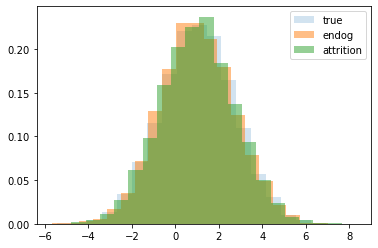

In [53]:
n = 10000
y,x,z = gen_data(nobs=n)

l1,yhat1 = setup_model(y,sm.add_constant(x))
l2,yhat2 = setup_model(y,sm.add_constant(z))
print(l1.sum()-l2.sum())

plt.hist(y,bins=int(n/500),alpha=.2,label='true',density=True)
plt.hist(yhat1,bins=int(n/500),alpha=.5,label='endog',density=True)
plt.hist(yhat2,bins=int(n/500),alpha=.5,label='attrition',density=True)
plt.legend()
plt.show()

1058.0082243852412


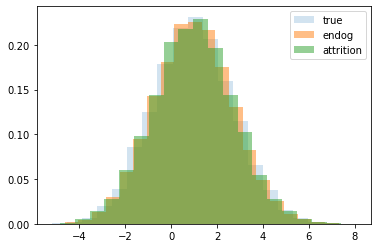

In [6]:

n = 10000
y,x,z = gen_data(nobs=n,d = 0,f = 1)

l1,yhat1 = setup_model(y,sm.add_constant(x))
l2,yhat2 = setup_model(y,sm.add_constant(z))
print(l1.sum()-l2.sum())

plt.hist(y,bins=int(n/500),alpha=.2,label='true',density=True)
plt.hist(yhat1,bins=int(n/500),alpha=.5,label='endog',density=True)
plt.hist(yhat2,bins=int(n/500),alpha=.5,label='attrition',density=True)
plt.legend()
plt.show()

-1465.7196940511603


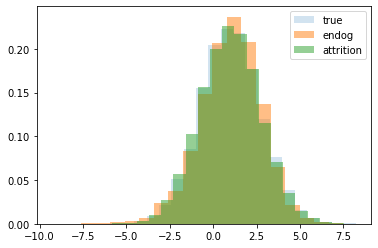

In [7]:
n = 10000
y,x,z = gen_data(nobs=n,d = 1,f = 0)

l1,yhat1 = setup_model(y,sm.add_constant(x))
l2,yhat2 = setup_model(y,sm.add_constant(z))
print(l1.sum()-l2.sum())

plt.hist(y,bins=int(n/500),alpha=.2,label='true',density=True)
plt.hist(yhat1,bins=int(n/500),alpha=.5,label='endog',density=True)
plt.hist(yhat2,bins=int(n/500),alpha=.5,label='attrition',density=True)
plt.legend()
plt.show()

0.0


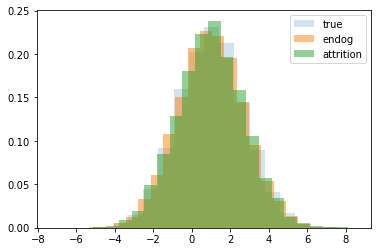

In [8]:
n = 10000
y,x,z = gen_data(nobs=n,d = 0,f = 0)

l1,yhat1 = setup_model(y,sm.add_constant(x))
l2,yhat2 = setup_model(y,sm.add_constant(z))
print(l1.sum()-l2.sum())

plt.hist(y,bins=int(n/500),alpha=.2,label='true',density=True)
plt.hist(yhat1,bins=int(n/500),alpha=.5,label='endog',density=True)
plt.hist(yhat2,bins=int(n/500),alpha=.5,label='attrition',density=True)
plt.legend()
plt.show()